<a href="https://colab.research.google.com/github/Firdavs222/Portfolio-projects/blob/main/amazonreviewcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews
License(s): CC0-1.0
amazon-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

file_name = "/content/amazon-reviews.zip"

output_dir = "./unzipped_data"
#zipfile.ZipFile(file_name)
#zipfile.ZipExtFile()
#with ZipFile(file_name) as myzip:
with ZipFile(file_name) as myfile:
        myfile.extractall("./unzipped_data")

In [ ]:
import pandas as pd

train = pd.read_csv("/content/unzipped_data/train.csv",header=None,names=("star_rating", "topics", "review_body"))
test = pd.read_csv("/content/unzipped_data/test.csv",header=None,names=("star_rating", "topics", "review_body"))

In [ ]:
# def treating(star):
#     if 1 <= int(star) <= 2:
#         star = "Negative"
#     elif 4 <= int(star) <= 5:
#         star = "Positive"
#     elif int(star) == 3:
#         return None

# train["star_rating"] = int(train["star_rating"]).apply(treating)

In [ ]:
from sklearn import preprocessing

d={
    1: "Negative",
    2: "Positive"
}
train["star_rating"]=train["star_rating"].map(d)
test["star_rating"]=test["star_rating"].map(d)

train = train.dropna()
test = test.dropna()

label_encoder = preprocessing.LabelEncoder()

train["star_rating"]= label_encoder.fit_transform(train["star_rating"])
test["star_rating"] = label_encoder.transform(test["star_rating"])

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

spec_chars = ".«»-―–""!!!!$:;_,*•—!?“”…^_________"
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def preprocessor(text):
    text = str(text)
    text.translate(str.maketrans("","",spec_chars))
    text.lower()
    #text = word_tokenize(text)
    return text
train["review_body"] = train["review_body"].apply(preprocessor)


In [ ]:
test["review_body"] = test["review_body"].apply(preprocessor)
x_train = train["review_body"]
x_test = test["review_body"]
y_train = train["star_rating"]
y_test = test["star_rating"]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
x_train_bow = bow_vectorizer.fit_transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_bowed = LogisticRegression(max_iter=10)
logistic_bowed.fit(x_train_bow, y_train)
y_pred_bowed = logistic_bowed.predict(x_test_bow)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test,y_pred_bowed)
f1 = f1_score(y_test,y_pred_bowed)
precision = precision_score(y_test,y_pred_bowed)
recall = recall_score(y_test,y_pred_bowed)

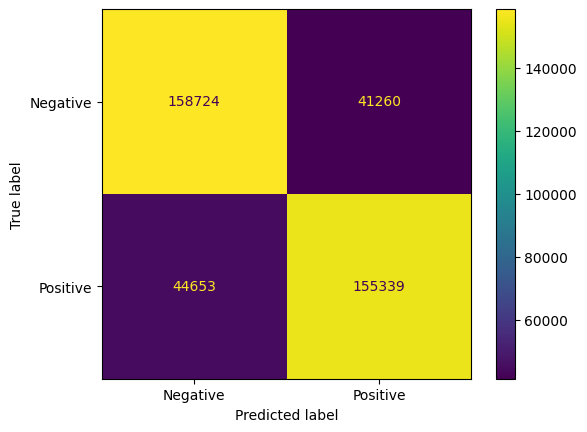

Accuracy score: 0.7852046122767367
F1_score: 0.7833712817487033
Precision score: 0.7901311807282845
Recall_score: 0.7767260690427618


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bowed)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative","Positive"])

cm_display.plot()
plt.show()

print(f"Accuracy score: {accuracy}")
print(f"F1_score: {f1}")
print(f"Precision score: {precision}")
print(f"Recall_score: {recall}")


"Accuracy" model qanchalik qiymatlarni to'g'ri topilganini aniqlaydi va 78,5% yaxshi lekin juda yaxshi emas, ya'ni model ko'proq train qilish kerakligini bildiradi.
"Precision" esa postive taxminlarning necha foizi to'g'ri topilganini ko'rsatadi.
"Recall" esa model qanchalik qiymatlarni postive deb to'g'ri aytishini belgilab beradi.
"F1 score" "precision" va "recall" qiymatlari o'rtacha garmonik qiymatidir.